In [2]:
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor as gbr, RandomForestRegressor as rfr
import pandas as pd
import numpy as np
from scipy import stats

houses_train = pd.read_csv('./Data/encoded_houses_train.csv')
houses_test = pd.read_csv('./Data/encoded_houses_test.csv')

In [3]:
private_lambda = 0.14
y_train = stats.boxcox(houses_train['SalePrice'], private_lambda)
x_train = houses_train.drop('SalePrice', axis=1)
print(y_train.shape)
print(x_train.shape)

(1460,)
(1460, 215)


In [4]:
y_train

array([ 32.53487238,  31.77193297,  32.92266604, ...,  33.92192983,
        30.46216348,  30.6581044 ])

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([   5.,   17.,  102.,  386.,  471.,  278.,  141.,   46.,   10.,    4.]),
 array([ 23.75067207,  25.41231376,  27.07395545,  28.73559713,
         30.39723882,  32.05888051,  33.72052219,  35.38216388,
         37.04380557,  38.70544725,  40.36708894]),
 <a list of 10 Patch objects>)

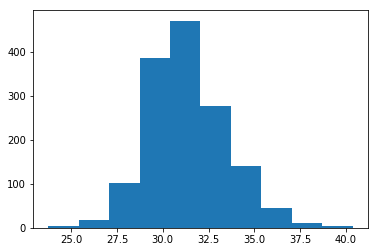

In [6]:
plt.hist(y_train)

In [21]:
from  sklearn import preprocessing
y_quant = pd.qcut(y_train, 5, labels=range(1,6))
le = preprocessing.LabelEncoder()
le.fit(y_quant)
y_quant = le.transform(y_quant)

In [23]:
stats.itemfreq(y_quant)

array([[  0, 295],
       [  1, 294],
       [  2, 287],
       [  3, 295],
       [  4, 289]])

In [24]:
logit = linear_model.LogisticRegression()
logit.set_params(C=1e4)
logit.fit(x_train, y_quant)

LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [25]:
print(logit.score(x_train, y_quant))

0.879452054795


In [26]:
print(x_train.shape)
print(y_train.shape)

(1460, 215)
(1460,)


In [27]:
logitCV = linear_model.LogisticRegressionCV(random_state=55, cv=5, n_jobs=-1, verbose=10, max_iter=100)
logitCV.fit(x_train, y_quant)

/home/paul/env/py35/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
/home/paul/env/py35/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
/home/paul/env/py35/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
/home/paul/env/py35/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
/home/paul/env/py35/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:718: UserWarning: l

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=55,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001,
           verbose=10)

In [28]:
logitCV.C_

array([ 0.00599484,  0.00599484,  0.00599484,  0.04641589,  0.04641589])

In [29]:
guesses = logitCV.predict(x_train)

In [30]:
from sklearn import metrics
metrics.accuracy_score(guesses, y_quant)

0.76917808219178085

In [18]:
metrics.confusion_matrix(guesses, y_quant)

array([[249,  44,  11,   0,   0],
       [ 38, 208,  62,   5,   0],
       [  7,  35, 165,  33,   2],
       [  1,   5,  45, 235,  21],
       [  0,   2,   4,  22, 266]])

In [21]:
guesses.shape

(1460,)